Importar as bibliotecas que serão usadas:

In [41]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold

Importar os dados treino e teste já criados:

In [42]:
train = pd.read_csv('/content/drive/My Drive/data/Titanic/train.csv')
test = pd.read_csv('/content/drive/My Drive/data/Titanic/test.csv')

Criar modelo de Machine Learning. Nesse caso, usamos o RandomForestClassifier:

In [43]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

Juntar as variáveis que serão usadas no modelo:

In [82]:
variaveis = ['Sex_bin', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

Criar função para transformar os dados do 'sexo' de cada passageiro para numérico, já que o modelo de ML usado não trabalha com strings:

In [45]:
def transformar_sexo(valor) :
  if valor == 'female' :
    return 1
  else:
    return 0

train['Sex_bin'] = train['Sex'].map(transformar_sexo)
test['Sex_bin'] = test['Sex'].map(transformar_sexo)

In [46]:

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


Separar os dados de variáveis(x) que serão usadas no teste e os resultados esperados(y) para treinar o modelo:

In [83]:
X = train[variaveis]
Y = train['Survived']

Foi necessário tirar os dados sem informação (NaN) e para isso, de forma simples, só transformamos eles em um número sem influência, como -1:

In [84]:
X = X.fillna(-1)
test[variaveis] = test[variaveis].fillna(-1)

# Validação Cruzada

In [85]:
resultados = []
i = 0
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=1)
for linhas_treino, linhas_valid in kf.split(X):
  i = i + 1
  print('Repetição', i)
  print('Treino:', linhas_treino.shape[0])
  print('Valid', linhas_valid.shape[0])

  X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
  Y_treino, Y_valid = Y.iloc[linhas_treino], Y.iloc[linhas_valid]

  modelo.fit(X_treino, Y_treino)
  prev = modelo.predict(X_valid)
  acc = np.mean(Y_valid == prev)
  resultados.append(acc)
  print('Acc:', acc)
  print()
  
print('Média:', np.mean(resultados))

Repetição 1
Treino: 445
Valid 446
Acc: 0.7847533632286996

Repetição 2
Treino: 446
Valid 445
Acc: 0.8292134831460675

Repetição 3
Treino: 445
Valid 446
Acc: 0.7757847533632287

Repetição 4
Treino: 446
Valid 445
Acc: 0.8224719101123595

Repetição 5
Treino: 445
Valid 446
Acc: 0.8026905829596412

Repetição 6
Treino: 446
Valid 445
Acc: 0.7820224719101123

Repetição 7
Treino: 445
Valid 446
Acc: 0.773542600896861

Repetição 8
Treino: 446
Valid 445
Acc: 0.7955056179775281

Repetição 9
Treino: 445
Valid 446
Acc: 0.8026905829596412

Repetição 10
Treino: 446
Valid 445
Acc: 0.8247191011235955

Repetição 11
Treino: 445
Valid 446
Acc: 0.7914798206278026

Repetição 12
Treino: 446
Valid 445
Acc: 0.802247191011236

Repetição 13
Treino: 445
Valid 446
Acc: 0.8139013452914798

Repetição 14
Treino: 446
Valid 445
Acc: 0.8067415730337079

Repetição 15
Treino: 445
Valid 446
Acc: 0.820627802690583

Repetição 16
Treino: 446
Valid 445
Acc: 0.7887640449438202

Repetição 17
Treino: 445
Valid 446
Acc: 0.8004484304

In [60]:
X_valid_check = train.iloc[linhas_valid].copy()
X_valid_check['prev'] = prev
X_valid_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin,prev
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0


In [62]:
X_valid_check.shape

(445, 14)

In [94]:
erros = X_valid_check[X_valid_check['Survived'] != X_valid_check['prev']]
erros = erros[['PassengerId',	'Pclass',	'Name',	'Sex',	'Age',	'SibSp',	'Parch',	'Ticket',	'Fare', 'Cabin',	'Embarked',	'Sex_bin',	'prev', 'Survived']]
erros.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin,prev,Survived
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1,0
17,18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0,0,1
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,0,1
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,1,0,1
27,28,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,0,1,0


Novas variáveis

In [97]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
#train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

train['Cabine_nula'] = train['Cabin'].isnull().astype(int)

train['Nome_contem_Miss'] = train['Name'].str.contains('Miss').astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains('Mrs').astype(int)
train['Nome_contem_Master'] = train['Name'].str.contains('Master').astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains('Col').astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains('Major').astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains('Mr').astype(int)

In [100]:
variaveis = ['Sex_bin', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Cabine_nula', 'Nome_contem_Miss', 'Nome_contem_Mrs', 'Nome_contem_Master', 'Nome_contem_Col', 'Nome_contem_Major', 'Nome_contem_Mr']

X= train[variaveis].fillna(-1)
Y= train['Survived']

In [99]:
resultados2 = []
i = 0
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=1)
for linhas_treino, linhas_valid in kf.split(X):
  i = i + 1
  print('Repetição', i)
  print('Treino:', linhas_treino.shape[0])
  print('Valid', linhas_valid.shape[0])

  X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
  Y_treino, Y_valid = Y.iloc[linhas_treino], Y.iloc[linhas_valid]

  modelo.fit(X_treino, Y_treino)
  prev = modelo.predict(X_valid)
  acc = np.mean(Y_valid == prev)
  resultados2.append(acc)
  print('Acc:', acc)
  print()
  
print('Média:', np.mean(resultados))

Repetição 1
Treino: 445
Valid 446
Acc: 0.7892376681614349

Repetição 2
Treino: 446
Valid 445
Acc: 0.8247191011235955

Repetição 3
Treino: 445
Valid 446
Acc: 0.7937219730941704

Repetição 4
Treino: 446
Valid 445
Acc: 0.8382022471910112

Repetição 5
Treino: 445
Valid 446
Acc: 0.7825112107623319

Repetição 6
Treino: 446
Valid 445
Acc: 0.8089887640449438

Repetição 7
Treino: 445
Valid 446
Acc: 0.7713004484304933

Repetição 8
Treino: 446
Valid 445
Acc: 0.8044943820224719

Repetição 9
Treino: 445
Valid 446
Acc: 0.8026905829596412

Repetição 10
Treino: 446
Valid 445
Acc: 0.8112359550561797

Repetição 11
Treino: 445
Valid 446
Acc: 0.8183856502242153

Repetição 12
Treino: 446
Valid 445
Acc: 0.802247191011236

Repetição 13
Treino: 445
Valid 446
Acc: 0.8228699551569507

Repetição 14
Treino: 446
Valid 445
Acc: 0.8

Repetição 15
Treino: 445
Valid 446
Acc: 0.8318385650224215

Repetição 16
Treino: 446
Valid 445
Acc: 0.802247191011236

Repetição 17
Treino: 445
Valid 446
Acc: 0.8026905829596412

Repeti

In [77]:
#%matplotlib inline
#%pylab inline
resultados2

[]

((array([1., 1., 1., 1., 9., 2., 0., 3., 0., 2.]),
  array([0.77130045, 0.77799063, 0.78468081, 0.79137099, 0.79806117,
         0.80475135, 0.81144153, 0.81813171, 0.82482189, 0.83151207,
         0.83820225]),
  <a list of 10 Patch objects>),
 (array([3., 1., 1., 2., 3., 4., 1., 1., 2., 2.]),
  array([0.77078652, 0.77662921, 0.78247191, 0.78831461, 0.7941573 ,
         0.8       , 0.8058427 , 0.81168539, 0.81752809, 0.82337079,
         0.82921348]),
  <a list of 10 Patch objects>))

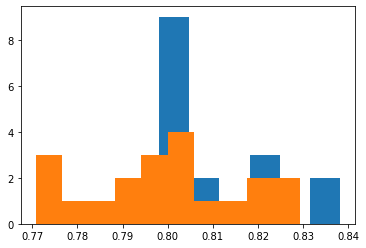

In [96]:
pylab.hist(resultados2), pylab.hist(resultados)

Usando Sex_bin e Age : Média: 0.757

Usando Sex_bin, Age, Pclass, SibSp, Parch e Fare : Média: 0.799

Usando ['Sex_bin', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Cabine_nula', 'Nome_contem_Miss', 'Nome_contem_Mrs', 'Nome_contem_Master', 'Nome_contem_Col', 'Nome_contem_Major', 'Nome_contem_Mr'] = 0.799

# Retreinar o modelo

In [102]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
#test['Embarked_Q'] = (test['Embarked'] == 'Q').astype(int)

test['Cabine_nula'] = test['Cabin'].isnull().astype(int)

test['Nome_contem_Miss'] = test['Name'].str.contains('Miss').astype(int)
test['Nome_contem_Mrs'] = test['Name'].str.contains('Mrs').astype(int)
test['Nome_contem_Master'] = test['Name'].str.contains('Master').astype(int)
test['Nome_contem_Col'] = test['Name'].str.contains('Col').astype(int)
test['Nome_contem_Major'] = test['Name'].str.contains('Major').astype(int)
test['Nome_contem_Mr'] = test['Name'].str.contains('Mr').astype(int)

modelo = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
modelo.fit(X,Y)

prev = modelo.predict(test[variaveis].fillna(-1))

In [103]:
sub = pd.Series(prev, index=test['PassengerId'], name='Survived')

In [104]:
sub.shape

(418,)

In [105]:
sub.to_csv('sexto_modelo.csv')

In [106]:
!head -n10 sexto_modelo.csv

PassengerId,Survived
892,0
893,0
894,0
895,1
896,0
897,0
898,0
899,0
900,1
